### Interactive figure for 1D Fourier transform

Colin Ophus - 2022 Dec 20


In [4]:
%matplotlib widget

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [214]:
from IPython.display import display
from ipywidgets import HBox, VBox, Dropdown, Layout, Label, widgets
# from ipywidgets import widgets, interact, GridspecLayout, Layout
from matplotlib import cm

In [434]:

class FourierTransform1D:
    """
    This class calculates and draws the 1D Fourier examples. Overall plot layout:
    left         -Fourier space, interactive scatter plot
    right top    -Real space, real/imag plotting, non-interative
    right bottom -Real space, real/imag plotting, non-interative
    
    Args:
        f (np.array):     numpy vector containing Fourier space representation of the function.
    
    """
    

    def __init__(
        self,
        f = np.zeros(32),
        ):
        
        # Figure layout
        fig = plt.figure(figsize=(8,4))
        ax_FFT   = fig.add_axes([0.1,  0.1,  0.35, 0.8])
        ax_real  = fig.add_axes([0.54, 0.55, 0.35, 0.35])
        ax_imag  = fig.add_axes([0.54, 0.55, 0.35, 0.35])
        ax_abs   = fig.add_axes([0.54, 0.1,  0.35, 0.35])
        ax_phase = fig.add_axes([0.54, 0.1,  0.35, 0.35])

        # axes limits, labels
        ax_FFT.set_xlim([-0.55, 0.55])
        ax_FFT.set_ylim([-0.05,1.05])
        ax_FFT.set_xlabel('Spatial Frequency [1/m]')
        ax_FFT.set_title('Fourier Space Samples')
        ax_FFT.set_ylabel('amplitude')

        ax_real.set_xlim([0.0,1.0])
        ax_real.set_ylim([-4.2,4.2])
        ax_real.set_title('Real Space Function')
        ax_real.set_ylabel('real', color=(1,0,0,1))
        ax_real.patch.set_alpha(0.0)

        ax_imag.set_xlim([0.0,1.0])
        ax_imag.set_ylim([-4.2,4.2])
        ax_imag.yaxis.tick_right()
        ax_imag.yaxis.set_label_position('right')
        ax_imag.set_ylabel('imaginary', color=(0,0.7,1.0,1))
        ax_imag.patch.set_alpha(0.0)

        ax_abs.set_xlim([0.0,1])
        ax_abs.set_ylim([-0.2,4.1])
        ax_abs.set_ylabel('amplitude', color=(1,0,0,1))
        ax_abs.patch.set_alpha(0.0)

        ax_phase.set_xlim([0.0,1.0])
        ax_phase.set_ylim([-3.3,3.3])
        ax_phase.yaxis.tick_right()
        ax_phase.yaxis.set_label_position('right')
        ax_phase.set_ylabel('phase', color=(0,0.7,1.0,1))
        ax_phase.set_yticks((
            -np.pi,
            -np.pi/2,
            0.0,
            np.pi/2,
            np.pi,
        ))
        ax_phase.set_yticklabels((
            '-pi',
            '-pi/2',
            '0',
            'pi/2',
            'pi',
        ))
        ax_phase.patch.set_alpha(0.0)

        
        # Calculate plotting functions
        self.calc_inv_transform(f)
        
        # FFT plots
        mag = np.abs(self.f)
        phase = np.angle(self.f)
        phase_c = cm.hsv(np.mod(phase/(2*np.pi),1.0))
        self.p = ax_FFT.scatter(
            self.q,
            mag,
            marker='o',
            facecolors=(1,1,1,1), 
            edgecolors=phase_c,
            linewidth=1.5,
            zorder=4,
        )
        self.p_lines = ax_FFT.vlines(
            self.q,
            ymin=np.zeros_like(self.q),
            ymax=mag,
            color=phase_c,
            linewidth=1.5,
        )
        
        # real / imag plots
        self.p_real = ax_real.plot(
            self.r,
            self.f_real,
            color=(1,0,0,1), 
            linewidth=1.5,
        )
        self.p_imag = ax_imag.plot(
            self.r,
            self.f_imag,
            c=(0,0.7,1.0,1),
            linewidth=1.5,
        )
        
        # abs / phase plots
        self.p_abs = ax_abs.plot(
            self.r,
            self.f_abs,
            color=(1,0,0,1), 
            linewidth=1.5,
        )
        self.p_phase = ax_phase.plot(
            self.r,
            self.f_phase,
            c=(0,0.7,1.0,1),
            linewidth=1.5,
        )
        
    def calc_inv_transform(
        self,
        f,
        upsample_factor = 4,
        ):
        """
        This function calculates the inverse Fourier transform of a function, 
        zero-padding it to Fourier upsample the real space result. 
        It saves all values (including coordinate vectors for plotting) locally.
        """
        
        # Fourier space
        self.f = np.array(f,dtype='complex')
        self.f = np.array(f,dtype='complex')
        self.q = np.fft.fftfreq(self.f.shape[0])
        
        # zero-padded Fourier space function
        self.f_pad = np.zeros(self.f.shape[0]*upsample_factor, dtype='complex')
        self.f_pad[:self.f.shape[0]//2] = self.f[:self.f.shape[0]//2]
        self.f_pad[1-self.f.shape[0]//2:] = self.f[1-self.f.shape[0]//2:]
        
        # Real space
        self.r = np.linspace(0.0,1.0,self.f_pad.shape[0])
        f_rs = np.fft.ifft(self.f_pad) * self.f_pad.shape[0] 
        self.f_real  = np.real(f_rs)
        self.f_imag  = np.imag(f_rs)
        self.f_abs   = np.abs(f_rs)
        self.f_phase = np.angle(f_rs * np.exp(1j*1e-8))

    def update_plot(self,f):
        """
        Update the plots
        """
        # Calculate plotting functions
        self.calc_inv_transform(f)
        
        # FFT plots
        mag = np.abs(self.f)
        phase = np.angle(self.f)
        phase_c = cm.hsv(np.mod(phase/(2*np.pi),1.0))
        self.p.set_offsets(np.vstack((self.q,mag)).T)

        seg_old = self.p_lines.get_segments()
        seg_new = [np.array([[qq,0],[qq,mm]]) for mm,qq in zip(mag,self.q)]
        self.p_lines.set_segments(seg_new)
        
        # real / imag
        self.p_real[0].set_xdata(self.r)
        self.p_real[0].set_ydata(self.f_real)
        self.p_imag[0].set_xdata(self.r)
        self.p_imag[0].set_ydata(self.f_imag)
        
        # amp / phase
        self.p_abs[0].set_xdata(self.r)
        self.p_abs[0].set_ydata(self.f_abs)
        self.p_phase[0].set_xdata(self.r)
        self.p_phase[0].set_ydata(self.f_phase)
        
        
        

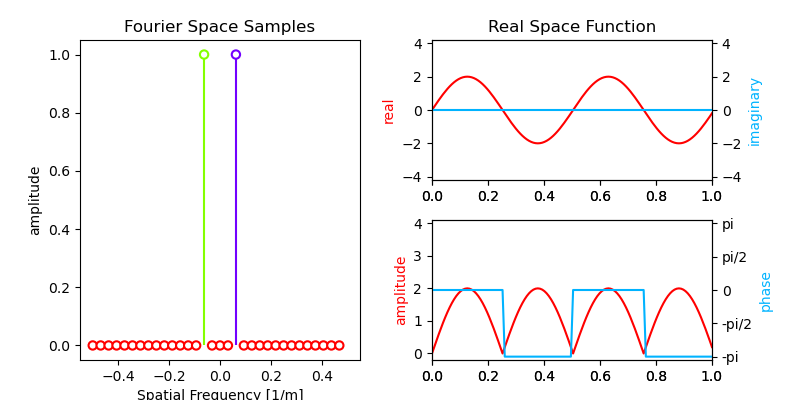

In [435]:
f = np.zeros(32, dtype='complex')
f[2] = -1j*1.0
f[-2] = 1j*1.0
# f[2] = 1.0
# f[-2] = 1.0
# f[3] = 1j*1.0
# f[-3] = 1j*1.0
# f = np.exp(1j*np.linspace(-np.pi,np.pi,16))

fft = FourierTransform1D(f)

In [431]:
# fft.p_lines.get_paths()

In [426]:
f = np.zeros(16, dtype='complex')
f[2] = -1j*1.0 
f[-2] = 1j*1.0 * 0
fft.update_plot(f)

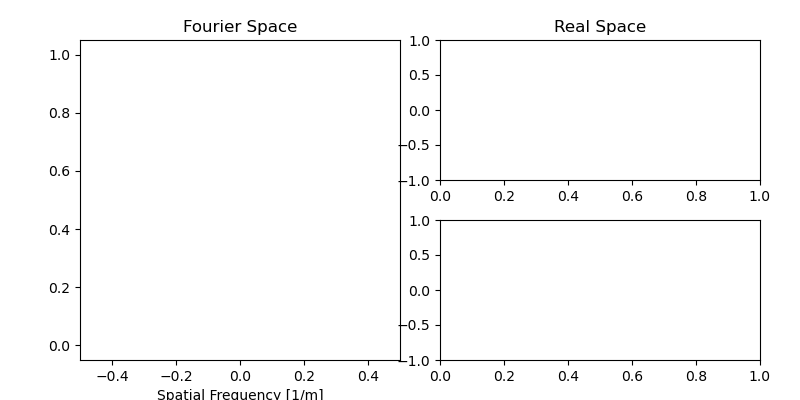

In [69]:




def select_preset_eventhandler(change):
    print(change.new)


# initialize plot
fft_plot = widgets.interactive_output(
    FourierTransform1D, 
    {}
)

option_list = (
    'cosine wave', 
    'sine wave', 
    'wavepacket',
)

# Widgets
dropdown = Dropdown(
    options = option_list,
    layout = Layout(width='200px',height='30px'),
)
dropdown.observe(select_preset_eventhandler, names='value')

# widget layouts
widget = VBox([
    HBox([
        Label('Preset Functions',layout=Layout(width='100px',height='30px')), 
        dropdown,
    ]),
    fft_plot,
])

display(widget)


# from ipywidgets import HBox, Label, Layout
#     label_layout = Layout(width='100px',height='30px')
#     HBox([Label('A description',layout=label_layout), IntSlider()])



In [302]:
print(fft.p.get_offsets().data)
fft.p.set_offsets?
print(fft.p.get_offsets().data)


[[ 0.      0.    ]
 [ 0.0625  0.    ]
 [ 0.125   1.    ]
 [ 0.1875  0.    ]
 [ 0.25    0.    ]
 [ 0.3125  0.    ]
 [ 0.375   0.    ]
 [ 0.4375  0.    ]
 [-0.5     0.    ]
 [-0.4375  0.    ]
 [-0.375   0.    ]
 [-0.3125  0.    ]
 [-0.25    0.    ]
 [-0.1875  0.    ]
 [-0.125   1.    ]
 [-0.0625  0.    ]]
[[ 0.      0.    ]
 [ 0.0625  0.    ]
 [ 0.125   1.    ]
 [ 0.1875  0.    ]
 [ 0.25    0.    ]
 [ 0.3125  0.    ]
 [ 0.375   0.    ]
 [ 0.4375  0.    ]
 [-0.5     0.    ]
 [-0.4375  0.    ]
 [-0.375   0.    ]
 [-0.3125  0.    ]
 [-0.25    0.    ]
 [-0.1875  0.    ]
 [-0.125   1.    ]
 [-0.0625  0.    ]]


In [5]:
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.artist import Artist

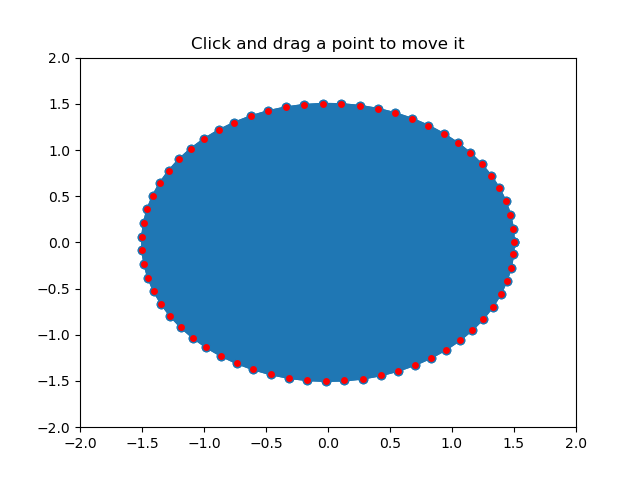

In [10]:

def dist(x, y):
    """
    Return the distance between two points.
    """
    d = x - y
    return np.sqrt(np.dot(d, d))


def dist_point_to_segment(p, s0, s1):
    """
    Get the distance of a point to a segment.
      *p*, *s0*, *s1* are *xy* sequences
    This algorithm from
    http://www.geomalgorithms.com/algorithms.html
    """
    v = s1 - s0
    w = p - s0
    c1 = np.dot(w, v)
    if c1 <= 0:
        return dist(p, s0)
    c2 = np.dot(v, v)
    if c2 <= c1:
        return dist(p, s1)
    b = c1 / c2
    pb = s0 + b * v
    return dist(p, pb)


class PolygonInteractor:
    """
    A polygon editor.

    Key-bindings

      't' toggle vertex markers on and off.  When vertex markers are on,
          you can move them, delete them

      'd' delete the vertex under point

      'i' insert a vertex at point.  You must be within epsilon of the
          line connecting two existing vertices

    """

    showverts = True
    epsilon = 5  # max pixel distance to count as a vertex hit

    def __init__(self, ax, poly):
        if poly.figure is None:
            raise RuntimeError('You must first add the polygon to a figure '
                               'or canvas before defining the interactor')
        self.ax = ax
        canvas = poly.figure.canvas
        self.poly = poly

        x, y = zip(*self.poly.xy)
        self.line = Line2D(x, y,
                           marker='o', markerfacecolor='r',
                           animated=True)
        self.ax.add_line(self.line)

        self.cid = self.poly.add_callback(self.poly_changed)
        self._ind = None  # the active vert

        canvas.mpl_connect('draw_event', self.on_draw)
        canvas.mpl_connect('button_press_event', self.on_button_press)
        canvas.mpl_connect('key_press_event', self.on_key_press)
        canvas.mpl_connect('button_release_event', self.on_button_release)
        canvas.mpl_connect('motion_notify_event', self.on_mouse_move)
        self.canvas = canvas

    def on_draw(self, event):
        self.background = self.canvas.copy_from_bbox(self.ax.bbox)
        self.ax.draw_artist(self.poly)
        self.ax.draw_artist(self.line)
        # do not need to blit here, this will fire before the screen is
        # updated

    def poly_changed(self, poly):
        """This method is called whenever the pathpatch object is called."""
        # only copy the artist props to the line (except visibility)
        vis = self.line.get_visible()
        Artist.update_from(self.line, poly)
        self.line.set_visible(vis)  # don't use the poly visibility state

    def get_ind_under_point(self, event):
        """
        Return the index of the point closest to the event position or *None*
        if no point is within ``self.epsilon`` to the event position.
        """
        # display coords
        xy = np.asarray(self.poly.xy)
        xyt = self.poly.get_transform().transform(xy)
        xt, yt = xyt[:, 0], xyt[:, 1]
        d = np.hypot(xt - event.x, yt - event.y)
        indseq, = np.nonzero(d == d.min())
        ind = indseq[0]
        

        if d[ind] >= self.epsilon:
            ind = None

        return ind

    def on_button_press(self, event):
        """Callback for mouse button presses."""
        if not self.showverts:
            return
        if event.inaxes is None:
            return
        if event.button != 1:
            return
        self._ind = self.get_ind_under_point(event)

    def on_button_release(self, event):
        """Callback for mouse button releases."""
        if not self.showverts:
            return
        if event.button != 1:
            return
        self._ind = None

    def on_key_press(self, event):
        """Callback for key presses."""
        if not event.inaxes:
            return
        if event.key == 't':
            self.showverts = not self.showverts
            self.line.set_visible(self.showverts)
            if not self.showverts:
                self._ind = None
        elif event.key == 'd':
            ind = self.get_ind_under_point(event)
            if ind is not None:
                self.poly.xy = np.delete(self.poly.xy,
                                         ind, axis=0)
                self.line.set_data(zip(*self.poly.xy))
        elif event.key == 'i':
            xys = self.poly.get_transform().transform(self.poly.xy)
            p = event.x, event.y  # display coords
            for i in range(len(xys) - 1):
                s0 = xys[i]
                s1 = xys[i + 1]
                d = dist_point_to_segment(p, s0, s1)
                if d <= self.epsilon:
                    self.poly.xy = np.insert(
                        self.poly.xy, i+1,
                        [event.xdata, event.ydata],
                        axis=0)
                    self.line.set_data(zip(*self.poly.xy))
                    break
        if self.line.stale:
            self.canvas.draw_idle()

    def on_mouse_move(self, event):
        """Callback for mouse movements."""
        if not self.showverts:
            return
        if self._ind is None:
            return
        if event.inaxes is None:
            return
        if event.button != 1:
            return
        x, y = event.xdata, event.ydata

        self.poly.xy[self._ind] = x, y
        if self._ind == 0:
            self.poly.xy[-1] = x, y
        elif self._ind == len(self.poly.xy) - 1:
            self.poly.xy[0] = x, y
        self.line.set_data(zip(*self.poly.xy))

        self.canvas.restore_region(self.background)
        self.ax.draw_artist(self.poly)
        self.ax.draw_artist(self.line)
        self.canvas.blit(self.ax.bbox)

        
if __name__ == '__main__':
    import matplotlib.pyplot as plt
    from matplotlib.patches import Polygon

    theta = np.arange(0, 2*np.pi, 0.1)
    r = 1.5

    xs = r * np.cos(theta)
    ys = r * np.sin(theta)

    poly = Polygon(np.column_stack([xs, ys]), animated=True)

    fig, ax = plt.subplots()
    ax.add_patch(poly)
    p = PolygonInteractor(ax, poly)

    ax.set_title('Click and drag a point to move it')
    ax.set_xlim((-2, 2))
    ax.set_ylim((-2, 2))
    plt.show()

In [12]:
p.epsilon

5

In [9]:
# import matplotlib.pyplot as plt
# from matplotlib.patches import Polygon

# theta = np.arange(0, 2*np.pi, 0.1)
# r = 1.5

# xs = r * np.cos(theta)
# ys = r * np.sin(theta)

# poly = Polygon(np.column_stack([xs, ys]), animated=True)

# fig, ax = plt.subplots()
# ax.add_patch(poly)
# p = PolygonInteractor(ax, poly)

# ax.set_title('Click and drag a point to move it')
# ax.set_xlim((-2, 2))
# ax.set_ylim((-2, 2))
# plt.show()